In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
##Load Dataset
df1 = pd.read_csv("S:\Project_Thesis\Jup\export_loan.csv")
df1.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,1
1,5316,1801,930711,165960,36,4610.0,0
2,6863,9188,930728,127080,60,2118.0,0
3,5325,1843,930803,105804,36,2939.0,0
4,7240,11013,930906,274740,60,4579.0,0


In [21]:
#split dataset in features and target variable
X=df1[['loan_id', 'account_id', 'payments']]  # Features
y=df1['status']  # Labels

In [24]:
#Split into train and test set using sklearn model_selection
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Dense 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
algorthims = []
algorthims.append(('LR', LogisticRegression()))
algorthims.append(('RFC', RandomForestClassifier()))
algorthims.append(('SVM', SVC()))


In [28]:
results = []
names = []
scoring = 'accuracy'
for name, algorthim in algorthims:
    k_fold_validation = KFold(n_splits=10, random_state=1)
    cv_results =cross_val_score(algorthim, X, y, cv=k_fold_validation, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s| Mean=%f STD=%f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\satya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR| Mean=0.888725 STD=0.051725


C:\Users\satya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RFC| Mean=0.856309 STD=0.038710


C:\Users\satya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\satya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM| Mean=0.888725 STD=0.051725


In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

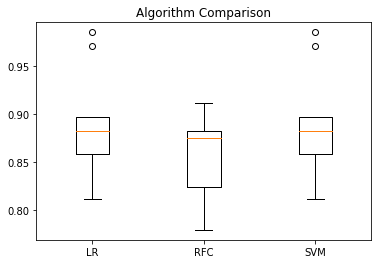

In [30]:
from matplotlib import pyplot
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()